In [1]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('yelp_project').getOrCreate()
sc = spark.sparkContext
import os
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
from pyspark.ml.feature import *

import string
import re
from pyspark.sql.functions import udf

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
%%time
data = spark.read.json('gs://irfan_me17b112/yelp_train.json/*.json')
drop_list = ['business_id','review_id','user_id','date']#'cool', 'funny''useful'
data = data.select([column for column in data.columns if column not in drop_list])
data.show(5)

+----+-----+-----+--------------------+------+
|cool|funny|stars|                text|useful|
+----+-----+-----+--------------------+------+
|   0|    0|  5.0|Great Mexican Foo...|     0|
|   1|    0|  4.0|Keung's is one of...|     1|
|   0|    0|  4.0|The food is great...|     1|
|   0|    0|  4.0|Saw this restaura...|     2|
|   0|    0|  5.0|Delicious rotisse...|     0|
+----+-----+-----+--------------------+------+
only showing top 5 rows

CPU times: user 12.2 ms, sys: 504 µs, total: 12.7 ms
Wall time: 28.1 s


In [6]:
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed = 100)

Text(0.5, 1.0, 'Distribution of ratings')

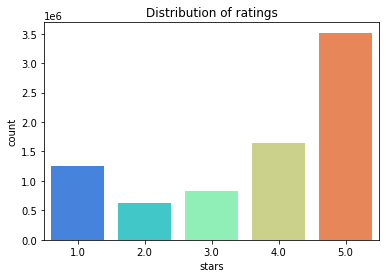

In [13]:
sns.countplot(x='stars',data= data.select('stars').toPandas(), palette='rainbow')
plt.title('Distribution of ratings')

In [15]:
data.select('cool').distinct().count()

198

In [16]:
data.select('useful').distinct().count()

264

In [17]:
data.select('funny').distinct().count()

208

In [19]:
data.groupBy('stars')

Text(0.5, 1.0, 'distribution of "funny" within each ratings')

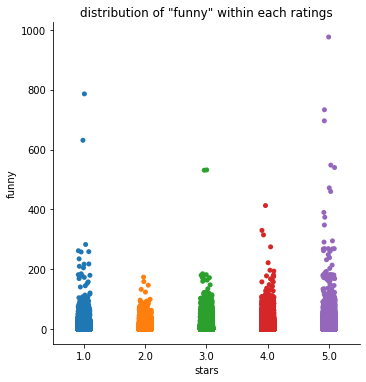

In [20]:
sns.catplot(x="stars", y="funny", data=data.select('stars','funny').toPandas())
plt.title('distribution of "funny" within each ratings')

Text(0.5, 1.0, 'distribution of "useful" within each ratings')

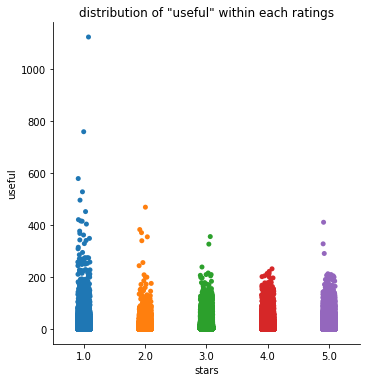

In [21]:
sns.catplot(x="stars", y="useful", data=data.select('stars','useful').toPandas())
plt.title('distribution of "useful" within each ratings')

Text(0.5, 1.0, 'distribution of "cool" within each ratings')

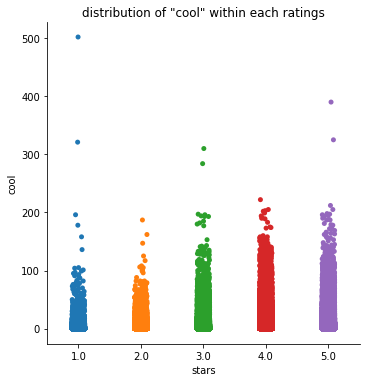

In [22]:
sns.catplot(x="stars", y="cool", data=data.select('stars','cool').toPandas())
plt.title('distribution of "cool" within each ratings')